In [203]:
import matplotlib.pyplot as plt
import numpy as np
import os

**Task 1: Write a function to read the sequence.fasta**

In [206]:
def read_fasta(fasta_file):
    """
    Reads a FASTA file and returns the sequence as a string.
    Skips the header lines starting with '>'.
    """
    with open(fasta_file, 'r') as file:
        sequence = ""
        for line in file:
            if not line.startswith('>'):  # Skip the header line
                sequence += line.strip()  # Remove newline characters and concatenate sequence
    return sequence

In [208]:
folder_path = "C:\\Users\\chuan\\Downloads\\Py_DS_ML_Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\05-Data-Visualization-with-Matplotlib\\sequence.fasta"
sequence = read_fasta(file_name)

print(len(sequence)) #print the length of the sequence string 

4639675


**Task 2: Print out the sub-sequence according to the starting and ending positions (integers input by users)**

In [211]:
def get_subsequence(sequence, start, end):
    if start < 0 or end > len(sequence) or start >= end:
        return "Invalid start or end positions. Please check the inputs."
    return sequence[start:end]

#Example
seq = "AGCTGATCGTACGATCG"
print("Original sequence:", seq)

#User inputs for start and end positions
start_pos = int(input("Enter the start position: "))
end_pos = int(input("Enter the end position: "))

#Extract and print the subsequence
subseq = get_subsequence(seq, start_pos, end_pos)
print("Subsequence:", subseq)

Original sequence: AGCTGATCGTACGATCG


Enter the start position:  0
Enter the end position:  4


Subsequence: AGCT


**Task 3: Segment the sequence in sequence.fasta with a window of 1000bp (1bp: a single character in sequence) without overlapping between windows, and calculate the percentage of C and G for each window**


In [214]:
def read_fasta(fasta_file):
    with open(fasta_file, 'r') as file:
        sequence = ""
        for line in file:
            if not line.startswith('>'):  
                sequence += line.strip() 
    return sequence

def calculate_CG_percentage(sequence, window_size=1000):
    """
    Segments the sequence into windows of 1000bp and calculates the percentage of C and G
    """
    num_windows = len(sequence) // window_size  # Number of full windows
    results = []
    
    for i in range(num_windows):
        window = sequence[i * window_size: (i + 1) * window_size]
        C_count = window.count('C')
        G_count = window.count('G')
        total_bases = len(window)
        
        C_percentage = (C_count / total_bases) * 100
        G_percentage = (G_count / total_bases) * 100
        
        results.append((i + 1, C_percentage, G_percentage)) 
    
    return results

def process_fasta(fasta_file, window_size=1000):
    """
    Process the FASTA file, calculate CG percentages, and print the results.
    """
    sequence = read_fasta(fasta_file)
    results = calculate_CG_percentage(sequence, window_size)
    
    # Print results for each window
    for i, C_percentage, G_percentage in results:
        print(f"Window {i}: C% = {C_percentage:.2f}%, G% = {G_percentage:.2f}%")

fasta_file = "C:\\Users\\chuan\\Downloads\\Py_DS_ML_Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\05-Data-Visualization-with-Matplotlib\\sequence.fasta"
process_fasta(fasta_file, window_size=1000)

Window 1: C% = 25.40%, G% = 25.30%
Window 2: C% = 25.40%, G% = 27.80%
Window 3: C% = 23.20%, G% = 28.70%
Window 4: C% = 25.30%, G% = 30.80%
Window 5: C% = 24.60%, G% = 28.60%
Window 6: C% = 24.30%, G% = 22.70%
Window 7: C% = 24.60%, G% = 26.80%
Window 8: C% = 28.60%, G% = 25.40%
Window 9: C% = 25.00%, G% = 25.60%
Window 10: C% = 24.70%, G% = 27.90%
Window 11: C% = 27.20%, G% = 25.30%
Window 12: C% = 21.50%, G% = 23.20%
Window 13: C% = 24.40%, G% = 25.30%
Window 14: C% = 25.60%, G% = 26.90%
Window 15: C% = 23.40%, G% = 29.70%
Window 16: C% = 26.00%, G% = 29.00%
Window 17: C% = 24.30%, G% = 25.60%
Window 18: C% = 22.60%, G% = 21.30%
Window 19: C% = 22.10%, G% = 28.20%
Window 20: C% = 22.70%, G% = 25.10%
Window 21: C% = 25.60%, G% = 24.80%
Window 22: C% = 24.00%, G% = 27.50%
Window 23: C% = 25.20%, G% = 28.30%
Window 24: C% = 27.60%, G% = 29.10%
Window 25: C% = 25.70%, G% = 29.60%
Window 26: C% = 26.00%, G% = 28.50%
Window 27: C% = 25.80%, G% = 29.30%
Window 28: C% = 26.10%, G% = 28.00%
W

**Task 4: Plot the percentage of C and G of all segmented windows (in task #3) using matplotlib: x-axis is position of a window, while y-axis is the percentage of C and G (either in a single graph or separately).**

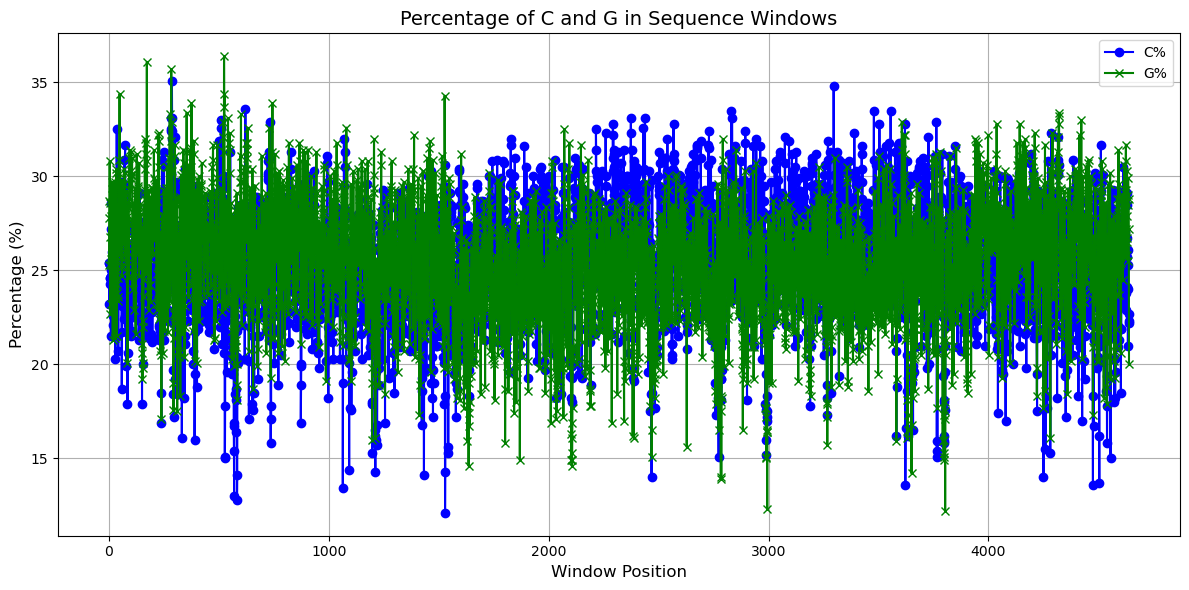

In [217]:
def plot_CG_percentages(fasta_file, window_size=1000):
    """
    Process the FASTA file, calculate C and G percentages, and plot the results.
    """
    sequence = read_fasta(fasta_file)  # Read the sequence from the FASTA file
    results = calculate_CG_percentage(sequence, window_size) #List of tuple 
    
    # Prepare data for plotting
    window_positions = [result[0] for result in results]  # Window indices
    C_percentages = [result[1] for result in results]  # C percentages
    G_percentages = [result[2] for result in results]  # G percentages

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(window_positions, C_percentages, label='C%', color='blue', marker='o')
    plt.plot(window_positions, G_percentages, label='G%', color='green', marker='x')

    plt.title("Percentage of C and G in Sequence Windows", fontsize=14)
    plt.xlabel("Window Position", fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
   
    plt.show()


fasta_file_path = "C:\\Users\\chuan\\Downloads\\Py_DS_ML_Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\05-Data-Visualization-with-Matplotlib\\sequence.fasta"  # Replace with the path to your FASTA file
plot_CG_percentages(fasta_file_path)
